# Carregando os dados

In [1]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [2]:
df.shape

(750000, 15)

In [3]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [4]:
dataset = df.sample(40000)

In [5]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [7]:
from pycaret.classification import *

C:\Users\lucas_000\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\lucas_000\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\lucas_000\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


# Alterando os dados de treino

In [8]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [9]:
#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [10]:
data.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.367083,-0.080291,0.893363,-0.041183,0.007944
idade,-0.367083,1.000000,0.332253,-0.339882,0.101001,-0.031295
tempo_emprego,-0.080291,0.332253,1.000000,-0.070439,0.489856,-0.140370
qt_pessoas_residencia,0.893363,-0.339882,-0.070439,1.000000,-0.050262,0.006861
renda,-0.041183,0.101001,0.489856,-0.050262,1.000000,-0.067472
mau,0.007944,-0.031295,-0.140370,0.006861,-0.067472,1.000000


In [11]:
data.mau.value_counts(normalize=True)

False    0.919868
True     0.080132
Name: mau, dtype: float64

In [12]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)



,Description,Value
0,session_id,1183
1,Target,mau
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(38000, 13)"
5,Missing Values,1
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,0
9,High Cardinality Features,0


In [13]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7153,0.7849,0.7088,0.1766,0.2827,0.1787,0.2463,4.3100
lda,Linear Discriminant Analysis,0.7095,0.7848,0.7097,0.1736,0.2789,0.1739,0.2419,0.3650
gbc,Gradient Boosting Classifier,0.7888,0.7736,0.5667,0.2025,0.2983,0.2057,0.2436,4.6375
ada,Ada Boost Classifier,0.7148,0.7687,0.6746,0.1711,0.2728,0.1677,0.2290,1.2400
lightgbm,Light Gradient Boosting Machine,0.8743,0.7610,0.3287,0.2646,0.2928,0.2248,0.2266,1.2725
xgboost,Extreme Gradient Boosting,0.8944,0.7397,0.1724,0.2540,0.2054,0.1511,0.1543,4.8575
rf,Random Forest Classifier,0.8597,0.7051,0.2043,0.1730,0.1873,0.1111,0.1116,3.0275
nb,Naive Bayes,0.1720,0.6802,0.9121,0.0809,0.1486,0.0037,0.0154,0.1675
et,Extra Trees Classifier,0.8574,0.6604,0.1948,0.1635,0.1777,0.1003,0.1008,3.8250
knn,K Neighbors Classifier,0.7637,0.6406,0.3957,0.1425,0.2095,0.1054,0.1246,7.7175


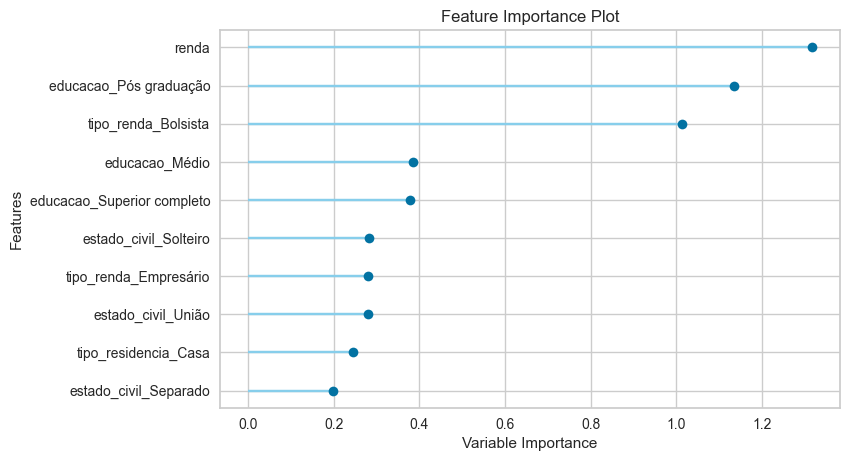

In [14]:
plot_model(best_model, plot='feature')

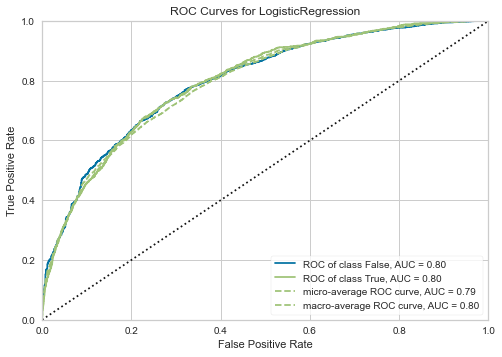

In [15]:
plot_model(best_model, plot='auc')

In [16]:
save_model(best_model,'LR Model Aula 5 062022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='mau',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [17]:
model_saved = load_model('LR Model Aula 5 062022')

Transformation Pipeline and Model Successfully Loaded


In [18]:
model_saved.named_steps

{'dtypes': DataTypes_Auto_infer(categorical_features=[], display_types=True,
                      features_todrop=[], id_columns=[],
                      ml_usecase='classification', numerical_features=[],
                      target='mau', time_features=[]),
 'imputer': Simple_Imputer(categorical_strategy='not_available',
                fill_value_categorical=None, fill_value_numerical=None,
                numeric_strategy='mean', target_variable=None),
 'new_levels1': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'ordinal': 'passthrough',
 'cardinality': 'passthrough',
 'znz': 'passthrough',
 'club_R_L': 'passthrough',
 'new_levels': New_Catagorical_Levels_in_TestData(replacement_strategy='least frequent',
                                    target='mau'),
 'feature_time': Make_Time_Features(list_of_features=None,
                    time_feature=Index([], dtype='object')),
 'group': 'passthrough',
 

In [ ]:
exp_aula4 = setup(data = data, target = 'mau',
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'])